# 제품 review 데이터의 감성 분석

***

### 목표 - 감성 분석의 기본 이해: 감성 분석이 무엇이며 그 응용에 대해 학습

- 데이터
    - (홀수) amazon_uk_shoes_products_dataset_2021_12.csv 
- 데이터 전처리: 머신 러닝 작업을 위해 데이터 전 처리하는 경험을 쌓음.
    - 데이터 정리 (노이즈 제거, 결측값 처리 등).
    - 텍스트 토큰화 및 불용어 제거.
    - 텍스트 정규화 (스테밍 또는 표제어 추출).
- 모델 구현: 수업에서 활용한 모델을 활용해서 구현.
    - 수업에서 홯용한 모델을 적용.
- 모델 학습 및 튜닝
    - 데이터셋을 학습 및 테스트 세트로 분할.
    - 모델 학습 및 하이퍼파라미터 튜닝 (예: 그리드 서치 또는 랜덤 서치 사용).
    - 교차 검증과 같은 기술을 사용하여 견고성 보장.
- 모델 평가: 적절한 지표를 사용하여 모델의 성능을 평가.
    - 정확도, 정밀도, 재현율, F1 점수 및 ROC-AUC와 같은 지표를 사용하여 모델 평가.
    - 오버피팅과 언더피팅을 논의하고 이를 해결하는 방법 학습.
- 시각화 및 해석: 결과를 시각화하고 해석
    - Matplotlib 또는 Seaborn과 같은 라이브러리를 사용하여 결과 시각화.
    - 혼동 행렬 및 ROC 곡선 생성.

***

## 데이터 전처리

### 데이터 확인
- url : 상품 URL 주소
- product_name : 상품명
- reviewer_name : 리뷰 작성자 이름
- review_title : 리뷰 제목
- review_text : 리뷰 내용
- review_rating : 리뷰 별점
- verified_purchase : 구매 확인 여부
- review_date : 리뷰 작성 날짜
- helpful_count : 리뷰가 도움이 된 사람의 수
- uniq_id : 리뷰 ID
- scraped_at : 리뷰를 가져온 시점

### 데이터 정리
- 결측치 확인
- 실제 구매자가 작성하지 않은 리뷰 제외
- 영어 리뷰만 사용

In [1]:
# 필요한 라이브러리 설치 및 다운
%pip install langdetect

from langdetect import detect
import re

import pandas as pd

Note: you may need to restart the kernel to use updated packages.


In [2]:
# 데이터 불러오기
file_path = './amazon_uk_shoes_products_dataset_2021_12.csv'
df = pd.read_csv(file_path)

In [3]:
# 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6823 entries, 0 to 6822
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   url                6823 non-null   object 
 1   product_name       6823 non-null   object 
 2   reviewer_name      6823 non-null   object 
 3   review_title       6822 non-null   object 
 4   review_text        6814 non-null   object 
 5   review_rating      6823 non-null   float64
 6   verified_purchase  6823 non-null   bool   
 7   review_date        6823 non-null   object 
 8   helpful_count      1953 non-null   object 
 9   uniq_id            6823 non-null   object 
 10  scraped_at         6823 non-null   object 
dtypes: bool(1), float64(1), object(9)
memory usage: 539.8+ KB


In [4]:
# 결측치 제거
df = df.dropna(subset=['review_title','review_text']) #review_title과 review_text열에 있는 결측치에 대해서만 전체 행 제거
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6813 entries, 0 to 6822
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   url                6813 non-null   object 
 1   product_name       6813 non-null   object 
 2   reviewer_name      6813 non-null   object 
 3   review_title       6813 non-null   object 
 4   review_text        6813 non-null   object 
 5   review_rating      6813 non-null   float64
 6   verified_purchase  6813 non-null   bool   
 7   review_date        6813 non-null   object 
 8   helpful_count      1950 non-null   object 
 9   uniq_id            6813 non-null   object 
 10  scraped_at         6813 non-null   object 
dtypes: bool(1), float64(1), object(9)
memory usage: 592.1+ KB


In [5]:
df['verified_purchase'] = df['verified_purchase'].astype(str) #문자열로 변환

# 실제 구매자가 작성하지 않은 리뷰 제외
df = df[df.verified_purchase != 'False']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6800 entries, 0 to 6822
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   url                6800 non-null   object 
 1   product_name       6800 non-null   object 
 2   reviewer_name      6800 non-null   object 
 3   review_title       6800 non-null   object 
 4   review_text        6800 non-null   object 
 5   review_rating      6800 non-null   float64
 6   verified_purchase  6800 non-null   object 
 7   review_date        6800 non-null   object 
 8   helpful_count      1950 non-null   object 
 9   uniq_id            6800 non-null   object 
 10  scraped_at         6800 non-null   object 
dtypes: float64(1), object(10)
memory usage: 637.5+ KB


In [6]:
# 감성분석에 필요한 'review_title', 'review_text', 'review_rating' 열만 선택
df = df[['review_rating', 'review_title', 'review_text']]

In [7]:
# 영어로 된 리뷰만 남기기

# 'review_text'가 영어인 행만 남기고 나머지 제거 하는 함수 정의
def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

df = df[df['review_text'].apply(is_english)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3818 entries, 0 to 6817
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   review_rating  3818 non-null   float64
 1   review_title   3818 non-null   object 
 2   review_text    3818 non-null   object 
dtypes: float64(1), object(2)
memory usage: 119.3+ KB


In [8]:
# 텍스트 전처리 함수
def preprocess_text(text):
    # 소문자 변환
    text = text.lower()
    # 숫자 제거
    text = re.sub(r'\d+', '', text)
    # 연속된 공백을 하나의 공백으로 통일
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# 'review_title'과 'review_text' 전처리
df['review_title'] = df['review_title'].apply(preprocess_text)
df['review_text'] = df['review_text'].apply(preprocess_text)

In [9]:
# 데이터 확인
df

,review_rating,review_title,review_text
0,5.0,love em,love these. was looking for converses and thes...
1,2.0,the plastic ripped,"the shoes are very cute, but after the nd day ..."
2,5.0,good quality,good quality
3,5.0,good,great
14,5.0,perfect right outta the box,true to size. if between i'd probably go with ...
...,...,...,...
6813,5.0,great for early walkers,the only shoes (after many tries) that worked ...
6814,3.0,three stars,too narrow hard to get on for a toddler
6815,5.0,said they were very comfortable.,my son loves them. said they were very comfort...
6816,2.0,they are smaller than other shoes the same size,size but they are smaller than the size my son...


In [10]:
# 필요 라이브러리 다운
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# NLTK 데이터 다운로드 (처음 한 번만 실행)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### 데이터 토큰화

In [11]:
# 텍스트 토큰화
df['review_title_token'] = df['review_title'].apply(word_tokenize)
df['review_text_token'] = df['review_text'].apply(word_tokenize)

In [12]:
# 데이터 확인
df

,review_rating,review_title,review_text,review_title_token,review_text_token
0,5.0,love em,love these. was looking for converses and thes...,"[love, em]","[love, these, ., was, looking, for, converses,..."
1,2.0,the plastic ripped,"the shoes are very cute, but after the nd day ...","[the, plastic, ripped]","[the, shoes, are, very, cute, ,, but, after, t..."
2,5.0,good quality,good quality,"[good, quality]","[good, quality]"
3,5.0,good,great,[good],[great]
14,5.0,perfect right outta the box,true to size. if between i'd probably go with ...,"[perfect, right, outta, the, box]","[true, to, size, ., if, between, i, 'd, probab..."
...,...,...,...,...,...
6813,5.0,great for early walkers,the only shoes (after many tries) that worked ...,"[great, for, early, walkers]","[the, only, shoes, (, after, many, tries, ), t..."
6814,3.0,three stars,too narrow hard to get on for a toddler,"[three, stars]","[too, narrow, hard, to, get, on, for, a, toddler]"
6815,5.0,said they were very comfortable.,my son loves them. said they were very comfort...,"[said, they, were, very, comfortable, .]","[my, son, loves, them, ., said, they, were, ve..."
6816,2.0,they are smaller than other shoes the same size,size but they are smaller than the size my son...,"[they, are, smaller, than, other, shoes, the, ...","[size, but, they, are, smaller, than, the, siz..."


### 불용어 제거

In [13]:
# 불용어 제거 함수
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in stop_words]

# 불용어 제거 적용
df['review_title_token'] = df['review_title_token'].apply(remove_stopwords)
df['review_text_token'] = df['review_text_token'].apply(remove_stopwords)

In [14]:
# 데이터 확인
df

,review_rating,review_title,review_text,review_title_token,review_text_token
0,5.0,love em,love these. was looking for converses and thes...,"[love, em]","[love, ., looking, converses, half, price, uni..."
1,2.0,the plastic ripped,"the shoes are very cute, but after the nd day ...","[plastic, ripped]","[shoes, cute, ,, nd, day, wearing, tongue, sta..."
2,5.0,good quality,good quality,"[good, quality]","[good, quality]"
3,5.0,good,great,[good],[great]
14,5.0,perfect right outta the box,true to size. if between i'd probably go with ...,"[perfect, right, outta, box]","[true, size, ., 'd, probably, go, lower, end, ..."
...,...,...,...,...,...
6813,5.0,great for early walkers,the only shoes (after many tries) that worked ...,"[great, early, walkers]","[shoes, (, many, tries, ), worked, early, walk..."
6814,3.0,three stars,too narrow hard to get on for a toddler,"[three, stars]","[narrow, hard, get, toddler]"
6815,5.0,said they were very comfortable.,my son loves them. said they were very comfort...,"[said, comfortable, .]","[son, loves, ., said, comfortable, .]"
6816,2.0,they are smaller than other shoes the same size,size but they are smaller than the size my son...,"[smaller, shoes, size]","[size, smaller, size, son, outgrowing, ., disa..."


### 데이터 정규화

In [15]:
# 표제어 추출 함수
lemmatizer = WordNetLemmatizer()

def lemmas(tokens):
    return [lemmatizer.lemmatize(word, pos='v') for word in tokens] #'v'는 동사(verb)라는 뜻

# 표제어 추출 적용
df['review_title_token'] = df['review_title_token'].apply(lemmas)
df['review_text_token'] = df['review_text_token'].apply(lemmas)

In [16]:
# 데이터 확인
df

,review_rating,review_title,review_text,review_title_token,review_text_token
0,5.0,love em,love these. was looking for converses and thes...,"[love, em]","[love, ., look, converse, half, price, unique—..."
1,2.0,the plastic ripped,"the shoes are very cute, but after the nd day ...","[plastic, rip]","[shoe, cute, ,, nd, day, wear, tongue, start, ..."
2,5.0,good quality,good quality,"[good, quality]","[good, quality]"
3,5.0,good,great,[good],[great]
14,5.0,perfect right outta the box,true to size. if between i'd probably go with ...,"[perfect, right, outta, box]","[true, size, ., 'd, probably, go, lower, end, ..."
...,...,...,...,...,...
6813,5.0,great for early walkers,the only shoes (after many tries) that worked ...,"[great, early, walkers]","[shoe, (, many, try, ), work, early, walker, b..."
6814,3.0,three stars,too narrow hard to get on for a toddler,"[three, star]","[narrow, hard, get, toddler]"
6815,5.0,said they were very comfortable.,my son loves them. said they were very comfort...,"[say, comfortable, .]","[son, love, ., say, comfortable, .]"
6816,2.0,they are smaller than other shoes the same size,size but they are smaller than the size my son...,"[smaller, shoe, size]","[size, smaller, size, son, outgrow, ., disappo..."


***
## 모델 구현

- VADER 모델 사용
- -1 ~ 1 사이의 소수점 값에서 0과 1로 분리된 이진 값으로 라벨링하는 함수 정의
- logistic regression 사용

In [17]:
# 필요 라이브러리 import
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [18]:
# VADER 감정 분석기 초기화
vader_sentiment = SentimentIntensityAnalyzer()

In [19]:
# 감정 분석 함수 정의
def calc_sentiment(review_tokens):
    if isinstance(review_tokens, list):
        review_text = ' '.join(review_tokens)  #토큰 리스트를 문자열로 변환
        return vader_sentiment.polarity_scores(review_text) #감성 분석
    else:
        return {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}  #기본값 반환

# 데이터 프레임의 각 리뷰에 대해 감정 분석 수행
df["review_title_sentiment_score"] = df['review_title_token'].apply(calc_sentiment)
df["review_text_sentiment_score"] = df['review_text_token'].apply(calc_sentiment)

# compound 점수만 추출하여 새로운 열 생성
df['review_title_compound'] = df['review_title_sentiment_score'].apply(lambda x: x['compound'])
df['review_text_compound'] = df['review_text_sentiment_score'].apply(lambda x: x['compound'])


In [20]:
# 데이터 확인
df

,review_rating,review_title,review_text,review_title_token,review_text_token,review_title_sentiment_score,review_text_sentiment_score,review_title_compound,review_text_compound
0,5.0,love em,love these. was looking for converses and thes...,"[love, em]","[love, ., look, converse, half, price, unique—...","{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'comp...","{'neg': 0.07, 'neu': 0.446, 'pos': 0.484, 'com...",0.6369,0.9188
1,2.0,the plastic ripped,"the shoes are very cute, but after the nd day ...","[plastic, rip]","[shoe, cute, ,, nd, day, wear, tongue, start, ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 0.841, 'pos': 0.159, 'comp...",0.0000,0.6705
2,5.0,good quality,good quality,"[good, quality]","[good, quality]","{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...","{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...",0.4404,0.4404
3,5.0,good,great,[good],[great],"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...","{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,0.6249
14,5.0,perfect right outta the box,true to size. if between i'd probably go with ...,"[perfect, right, outta, box]","[true, size, ., 'd, probably, go, lower, end, ...","{'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'comp...","{'neg': 0.07, 'neu': 0.728, 'pos': 0.202, 'com...",0.5719,0.6361
...,...,...,...,...,...,...,...,...,...
6813,5.0,great for early walkers,the only shoes (after many tries) that worked ...,"[great, early, walkers]","[shoe, (, many, try, ), work, early, walker, b...","{'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'comp...","{'neg': 0.0, 'neu': 0.623, 'pos': 0.377, 'comp...",0.6249,0.8658
6814,3.0,three stars,too narrow hard to get on for a toddler,"[three, star]","[narrow, hard, get, toddler]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.318, 'neu': 0.682, 'pos': 0.0, 'comp...",0.0000,-0.1027
6815,5.0,said they were very comfortable.,my son loves them. said they were very comfort...,"[say, comfortable, .]","[son, love, ., say, comfortable, .]","{'neg': 0.0, 'neu': 0.233, 'pos': 0.767, 'comp...","{'neg': 0.0, 'neu': 0.211, 'pos': 0.789, 'comp...",0.5106,0.8176
6816,2.0,they are smaller than other shoes the same size,size but they are smaller than the size my son...,"[smaller, shoe, size]","[size, smaller, size, son, outgrow, ., disappo...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.351, 'neu': 0.649, 'pos': 0.0, 'comp...",0.0000,-0.4019


### 라벨링

In [21]:
# logistic regression 적용을 위한 라벨링 함수 정의
def change_to_binary(sentiment_label):
    if sentiment_label >= 0.001: #0.001 이상이면 긍정, 나머지는 부정
        return 1
    else:
        return 0
    
# 데이터 프레임의 각 리뷰에 대해 라벨링
df["review_title_sentiment_label"] = df.review_title_compound.apply(change_to_binary)
df["review_text_sentiment_label"] = df.review_text_compound.apply(change_to_binary)

In [22]:
# 데이터 확인
df

,review_rating,review_title,review_text,review_title_token,review_text_token,review_title_sentiment_score,review_text_sentiment_score,review_title_compound,review_text_compound,review_title_sentiment_label,review_text_sentiment_label
0,5.0,love em,love these. was looking for converses and thes...,"[love, em]","[love, ., look, converse, half, price, unique—...","{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'comp...","{'neg': 0.07, 'neu': 0.446, 'pos': 0.484, 'com...",0.6369,0.9188,1,1
1,2.0,the plastic ripped,"the shoes are very cute, but after the nd day ...","[plastic, rip]","[shoe, cute, ,, nd, day, wear, tongue, start, ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 0.841, 'pos': 0.159, 'comp...",0.0000,0.6705,0,1
2,5.0,good quality,good quality,"[good, quality]","[good, quality]","{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...","{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...",0.4404,0.4404,1,1
3,5.0,good,great,[good],[great],"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...","{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,0.6249,1,1
14,5.0,perfect right outta the box,true to size. if between i'd probably go with ...,"[perfect, right, outta, box]","[true, size, ., 'd, probably, go, lower, end, ...","{'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'comp...","{'neg': 0.07, 'neu': 0.728, 'pos': 0.202, 'com...",0.5719,0.6361,1,1
...,...,...,...,...,...,...,...,...,...,...,...
6813,5.0,great for early walkers,the only shoes (after many tries) that worked ...,"[great, early, walkers]","[shoe, (, many, try, ), work, early, walker, b...","{'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'comp...","{'neg': 0.0, 'neu': 0.623, 'pos': 0.377, 'comp...",0.6249,0.8658,1,1
6814,3.0,three stars,too narrow hard to get on for a toddler,"[three, star]","[narrow, hard, get, toddler]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.318, 'neu': 0.682, 'pos': 0.0, 'comp...",0.0000,-0.1027,0,0
6815,5.0,said they were very comfortable.,my son loves them. said they were very comfort...,"[say, comfortable, .]","[son, love, ., say, comfortable, .]","{'neg': 0.0, 'neu': 0.233, 'pos': 0.767, 'comp...","{'neg': 0.0, 'neu': 0.211, 'pos': 0.789, 'comp...",0.5106,0.8176,1,1
6816,2.0,they are smaller than other shoes the same size,size but they are smaller than the size my son...,"[smaller, shoe, size]","[size, smaller, size, son, outgrow, ., disappo...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.351, 'neu': 0.649, 'pos': 0.0, 'comp...",0.0000,-0.4019,0,0


#### 리뷰 제목과 리뷰 내용 비교

In [23]:
# 리뷰의 제목과 내용에 대하여 라벨링된 감정 점수가 일치하는지 확인하는 함수 정의
def check_labeling(review_title_sentiment_label, review_text_sentiment_label):
    if review_title_sentiment_label == 1 and review_text_sentiment_label == 1:
        return "Match"
    elif review_title_sentiment_label == 0 and review_text_sentiment_label == 0:
        return "Match"
    else:
        return "Mismatch"

# 점수 비교
df['check_labeling'] = df.apply(lambda row: check_labeling(row['review_title_sentiment_label'], row['review_text_sentiment_label']), axis=1)

In [24]:
# 데이터 확인
df[['review_title_sentiment_label', 'review_text_sentiment_label', 'check_labeling']]

,review_title_sentiment_label,review_text_sentiment_label,check_labeling
0,1,1,Match
1,0,1,Mismatch
2,1,1,Match
3,1,1,Match
14,1,1,Match
...,...,...,...
6813,1,1,Match
6814,0,0,Match
6815,1,1,Match
6816,0,0,Match


In [25]:
# Match로 출력되는 비율 계산
match_count = (df['check_labeling'] == 'Match').sum() #'check_labeling' 열에서 'Match'인 항목의 수를 세고 match_count에 저장
total_count = len(df) #DataFrame의 총 행 수를 total_count에 저장
match_ratio = match_count / total_count #'Match'로 출력되는 비율을 계산하여 match_ratio에 저장
print("matching ratio", match_ratio)

matching ratio 0.678365636458879


0.67로 유의미한 비교는 아니라고 생각함.

#### 리뷰 별점과 리뷰 제목 비교

In [26]:
# 리뷰 별점과 리뷰 제목에 대하여 라벨링된 감정 점수가 일치하는지 확인하는 함수 정의
def check_labeling(review_rating, review_title_sentiment_label):
    if review_rating >= 3 and review_title_sentiment_label == 1:
        return "Match"
    elif review_rating < 3 and review_title_sentiment_label == 0:
        return "Match"
    else:
        return "Mismatch"

# 점수 비교
df['check_labeling'] = df.apply(lambda row: check_labeling(row['review_rating'], row['review_title_sentiment_label']), axis=1)

In [27]:
# 데이터 확인
df[['review_rating', 'review_title_sentiment_label', 'check_labeling']]

,review_rating,review_title_sentiment_label,check_labeling
0,5.0,1,Match
1,2.0,0,Match
2,5.0,1,Match
3,5.0,1,Match
14,5.0,1,Match
...,...,...,...
6813,5.0,1,Match
6814,3.0,0,Mismatch
6815,5.0,1,Match
6816,2.0,0,Match


In [28]:
# Match로 출력되는 비율 계산
match_count = (df['check_labeling'] == 'Match').sum() #'check_labeling' 열에서 'Match'인 항목의 수를 세고 match_count에 저장
total_count = len(df) #DataFrame의 총 행 수를 total_count에 저장
match_ratio = match_count / total_count #'Match'로 출력되는 비율을 계산하여 match_ratio에 저장
print("matching ratio", match_ratio)

matching ratio 0.7207962283918282


0.71로 이 또한 유의미한 향상은 아님

#### 리뷰 별점과 리뷰 내용 비교

In [29]:
# 리뷰 별점과 리뷰 내용에 대하여 라벨링된 감정 점수가 일치하는지 확인하는 함수 정의
def check_labeling(review_rating, review_text_sentiment_label):
    if review_rating >= 3 and review_text_sentiment_label == 1:
        return "Match"
    elif review_rating < 3 and review_text_sentiment_label == 0:
        return "Match"
    else:
        return "Mismatch"

# 점수 비교
df['check_labeling'] = df.apply(lambda row: check_labeling(row['review_rating'], row['review_text_sentiment_label']), axis=1)

In [30]:
# 데이터 확인
df[['review_rating', 'review_text_sentiment_label', 'check_labeling']]

,review_rating,review_text_sentiment_label,check_labeling
0,5.0,1,Match
1,2.0,1,Mismatch
2,5.0,1,Match
3,5.0,1,Match
14,5.0,1,Match
...,...,...,...
6813,5.0,1,Match
6814,3.0,0,Mismatch
6815,5.0,1,Match
6816,2.0,0,Match


In [31]:
# Match로 출력되는 비율 계산
match_count = (df['check_labeling'] == 'Match').sum() #'check_labeling' 열에서 'Match'인 항목의 수를 세고 match_count에 저장
total_count = len(df) #DataFrame의 총 행 수를 total_count에 저장
match_ratio = match_count / total_count #'Match'로 출력되는 비율을 계산하여 match_ratio에 저장
print("matching ratio", match_ratio)

matching ratio 0.8334206390780513


0.83으로 가장 매치율이 높은 것을 확인.

#### VADER의 강점
- 사용 용이성
    - VADER는 사전 훈련된 모델로서, 별도의 훈련 없이 즉시 사용할 수 있다.
- 정확한 감정 분석
    - 감정 점수(positive, negative, neutral, compound)를 모두 제공하여 다양한 측면에서 감정을 분석할 수 있다.

#### VADER의 약점
- 사전의 한계
    - VADER는 미리 정의된 단어 사전을 사용하므로, 새로운 단어나 신조어를 인식하지 못할 수 있다.
- 부정어 처리
    - VADER는 "not bad"와 같은 부정어를 적절히 처리하지만, 복잡한 부정 표현에서는 한계가 있을 수 있다.


***
## 모델 학습 및 튜닝, 모델 평가

- 정확도 (Accuracy)
    - 전체 데이터 중 올바르게 예측된 샘플의 비율.
    - 단순하지만, 클래스 불균형이 심한 경우에는 부적절.
    - 공식: Accuracy = (True Positives + True Negatives) / Total Samples
​
 
- 정밀도 (Precision)
    - 모델이 양성이라고 예측한 것 중 실제 양성의 비율.
    - 중요한 경우: 양성 예측이 정확해야 할 때 (예: 스팸 필터링, 의료 진단).
    - 공식: Precision = True Positives / (True Positives + False Positives)
​
 
- 재현율 (Recall)
    - 실제 양성 중 모델이 양성이라고 예측한 비율.
    - 중요한 경우: 실제 양성을 최대한 많이 찾아야 할 때 (예: 질병 검출).
    - 공식: Recall = True Positives / (True Positives + False Negatives)
​
 
- F1 점수 (F1 Score)
    - 정밀도와 재현율의 조화 평균.
    - 불균형 클래스 문제에서 유용.
    - 공식: F1 Score = 2 ⋅ ( Precision⋅Recall / (Precision + Recall) )
 
- ROC-AUC (Receiver Operating Characteristic - Area Under Curve)
    - 모델의 분류 임계값을 바꾸면서, 참 긍정 비율(TPR)과 거짓 긍정 비율(FPR)을 비교한 곡선의 아래 면적.
    - 0.5는 랜덤 예측, 1.0은 완벽한 예측을 의미.

In [32]:
# 필요 라이브러리 다운
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [33]:
# 특성과 라벨 분리
# X = df["review_text_compound"].values.reshape(-1, 1)  #특성 데이터는 2차원 배열
# y = df["review_text_sentiment_label"]
X = df[['review_title_compound', 'review_text_compound']]
y = df['review_text_sentiment_label']

# 학습 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=77)

# 로지스틱 회귀 모델 초기화
log_reg = LogisticRegression()

# 하이퍼파라미터 그리드 정의
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000]}

# 그리드 서치 초기화
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')

# 모델 학습
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'C': 1000}


In [34]:
# 최적의 모델 선택
best_model = grid_search.best_estimator_

# 예측
y_pred = best_model.predict(X_test)

# 평가 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC-AUC: {roc_auc}")


Accuracy: 0.9947643979057592
Precision: 1.0
Recall: 0.9938775510204082
F1 Score: 0.9969293756397134
ROC-AUC: 0.9969387755102042


- 오버피팅
    - 모델이 학습 데이터에 과적합되어 테스트 데이터에서 성능이 저하되는 현상. 
    - 교차 검증, 정규화, 더 많은 데이터 수집으로 해결.
- 언더피팅
    - 모델이 학습 데이터의 패턴을 제대로 학습하지 못한 경우.
    - 모델의 복잡성 증가, 더 많은 특징 사용으로 해결

In [35]:
# 교차 검증
cv_scores_accuracy = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy scores: {cv_scores_accuracy}")
print(f"Mean cross-validation accuracy: {np.mean(cv_scores_accuracy)}") #평균
print(f"Standard deviation of cross-validation accuracy: {np.std(cv_scores_accuracy)}") #표준편차
print('\n')

cv_scores_precision = cross_val_score(best_model, X, y, cv=5, scoring='precision')
print(f"Cross-validation precision scores: {cv_scores_precision}")
print(f"Mean cross-validation precision: {np.mean(cv_scores_precision)}") #평균
print(f"Standard deviation of cross-validation precision: {np.std(cv_scores_precision)}") #표준편차
print('\n')

cv_scores_recall = cross_val_score(best_model, X, y, cv=5, scoring='recall')
print(f"Cross-validation recall scores: {cv_scores_recall}")
print(f"Mean cross-validation recall: {np.mean(cv_scores_recall)}") #평균
print(f"Standard deviation of cross-validation recall: {np.std(cv_scores_recall)}") #표준편차
print('\n')

cv_scores_f1 = cross_val_score(best_model, X, y, cv=5, scoring='f1')
print(f"Cross-validation f1 scores: {cv_scores_f1}")
print(f"Mean cross-validation f1: {np.mean(cv_scores_f1)}") #평균
print(f"Standard deviation of cross-validation f1: {np.std(cv_scores_f1)}") #표준편차
print('\n')

cv_scores_roc_auc = cross_val_score(best_model, X, y, cv=5, scoring='roc_auc')
print(f"Cross-validation roc_auc scores: {cv_scores_roc_auc}")
print(f"Mean cross-validation roc_auc: {np.mean(cv_scores_roc_auc)}") #평균
print(f"Standard deviation of cross-validation roc_auc: {np.std(cv_scores_roc_auc)}") #표준편차

Cross-validation accuracy scores: [0.9986911  0.9973822  0.9973822  0.99868938 0.99606815]
Mean cross-validation accuracy: 0.9976426066848278
Standard deviation of cross-validation accuracy: 0.0009807763998808984


Cross-validation precision scores: [1. 1. 1. 1. 1.]
Mean cross-validation precision: 1.0
Standard deviation of cross-validation precision: 0.0


Cross-validation recall scores: [0.99847793 0.99695586 0.99695586 0.99847793 0.99542683]
Mean cross-validation recall: 0.9972588818353936
Standard deviation of cross-validation recall: 0.0011412465020327774


Cross-validation f1 scores: [0.99923839 0.99847561 0.99847561 0.99923839 0.99770817]
Mean cross-validation f1: 0.9986272328889912
Standard deviation of cross-validation f1: 0.0005723046022707091


Cross-validation roc_auc scores: [0.99953058 1.         1.         1.         1.        ]
Mean cross-validation roc_auc: 0.9999061153074724
Standard deviation of cross-validation roc_auc: 0.00018776938505529194


In [36]:
# 필요한 라이브러리 import
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve

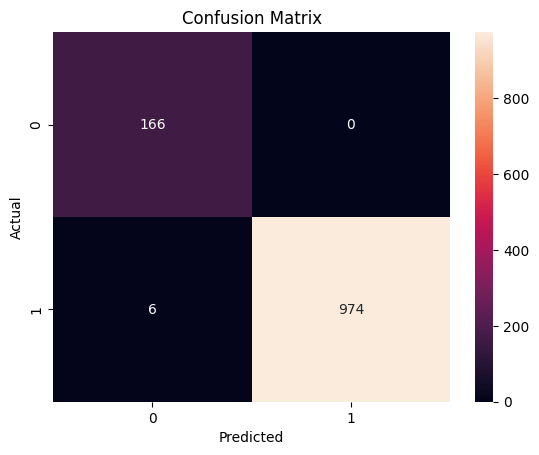

In [37]:
# 혼동 행렬 생성
conf_matrix = confusion_matrix(y_test, y_pred)

# 혼동 행렬 시각화  
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

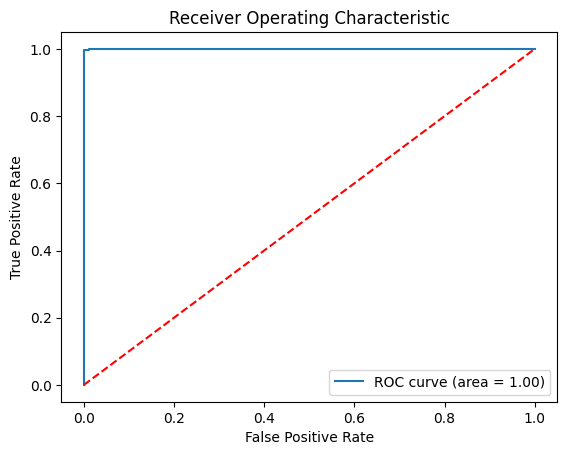

In [39]:
#ROC 곡선 생성
y_prob = best_model.predict_proba(X_test)[:, 1] #테스트 데이터에 대한 예측 확률을 반환. [:, 1]은 긍정 클래스(1)의 확률을 선택.
fpr, tpr, thresholds = roc_curve(y_test, y_prob) #다양한 임계값에 대한 FPR(False Positive Rate), TPR(True Positive Rate) 계산

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc) #FPR를 x축, TPR를 y축으로 그래프 생성
plt.plot([0, 1], [0, 1], 'r--') #축 시작과 끝 지정
plt.xlabel('False Positive Rate') #x축 제목 지정
plt.ylabel('True Positive Rate') #y축 제목 지정
plt.title('Receiver Operating Characteristic') #그래프 제목 지정
plt.legend(loc="lower right") #우하단 범례 위치 지정
plt.show()

ROC 곡선은 FPR을 x축, TPR을 y축으로 그린 그래프이다.

0.9969387755102042 으로 1.0에 가깝다. 즉, 거의 완벽한 예측을 하고 있음을 확인할 수 있다.